In [1]:
# https://stackoverflow.com/questions/56044487/toolbar-not-visible-after-setting-jupyter-notebook-theme
# jt -t oceans16 -T -N
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Link de los datos

In [2]:
# Link del dataset: https://www.kaggle.com/datasets/CooperUnion/cardataset
# El dataset sobre carros
df = pd.read_csv("data/data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Definiendo la Función de Costo y la función de Hipótesis $H_{\theta}(x)$
- Función de Costo:
$$
J(\theta)=J(\theta_{0},\theta_{1},\dots,\theta_{n})\\
J(\theta) = \frac{1}{2m}\sum_{i=0}^{m}( h_{\theta}(x^{(i)})-y^{(i)})^{2}
$$
- Hipótesis
$$
h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1} + \dots + \theta_{n}x_{n} = \theta^{T}x
$$

In [3]:
def predict(thetas, x_data):
    return np.dot(x_data, thetas)

In [4]:
def fun_cost(x_data, y_result, thetas):
    cost = 0
    # m
    len_data_x = x_data.shape[0]
    cost = 0

    predict_error = predict(thetas, x_data) - y_result
    square_predict_error = np.power(predict_error, 2)

    sumatoria_error_cuadratico = np.sum(square_predict_error)
    cost = 1.0 / (2 * len_data_x) * sumatoria_error_cuadratico
    return cost

<b>Gradiente</b>
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Gradientes</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [5]:
# gradiente descendiente
def gradient_descent(x_data, y_data, thetas, learning_rate=0.01, iterations=100):
    m = len(y_data)
    cost_history = np.zeros(iterations)
    n_features_ones = len(thetas)
    theta_history = np.zeros((iterations, n_features_ones))

    y_data = y_data.flatten()

    for it in range(iterations):
        prediction = predict(thetas, x_data)  # 8921
        thetas = thetas - learning_rate * (1 / m) * (
            x_data.T.dot((prediction - y_data))
        )

        theta_history[it] = thetas
        cost_history[it] = fun_cost(x_data, y_data, thetas)

    return thetas, cost_history, theta_history

## Función para llamar a los experimentos

In [6]:
from sklearn import preprocessing
# scaler.mean_ : ver la media de cala columna
# to std : estimador sesgado 
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
def readData_scaler(file_name,features,label_y):
    #lectura     
    df = pd.read_csv("data/"+ file_name+".csv")
    n_features= len(features)
    
    df = df[features+[label_y]]
    df = df.dropna()

    #normalizar     
    scaler = preprocessing.StandardScaler(with_std=True,with_mean=True).fit(df)
    scaler_data = scaler.transform(df)
    df_scaler = pd.DataFrame(scaler_data,columns=df.columns)
    
    return df_scaler

In [7]:
from sklearn.model_selection import train_test_split

def experiment(df, confg_train, features, label_y, percentage_test=0.3):
    n_features = len(features)
    
    # Separar datos
    df_scaler_train, df_scaler_test = train_test_split(
        df, test_size=percentage_test, random_state=30
    )
    train_x_scaler = df_scaler_train[features].to_numpy()
    train_y_scaler = df_scaler_train[label_y].to_numpy()
    
    test_x_scaler = df_scaler_test[features].to_numpy()
    test_y_scaler = df_scaler_test[label_y].to_numpy()

    # Añadir la columna de 1
    n_ones = np.ones([len(train_x_scaler), 1])
    train_x_scaler = np.concatenate((n_ones, train_x_scaler), axis=1)

    # Inicializar theta
    thetas = np.zeros(n_features + 1)
    # thetas = np.random.randint(low = 10,size = n_features + 1).reshape(n_features + 1, 1)
    # thetas = thetas.flatten()
    
    # Gradiente Descendiente
    # confg_train = [alpha, iterations]
    theta_optimum, cost_history, theta_history = gradient_descent(
        train_x_scaler, train_y_scaler, thetas, confg_train[0], confg_train[1]
    )
    
    print("Theta =", theta_optimum)
    print("Final Cost = ", cost_history[-1])
    
    y_predict = predict(theta_optimum,train_x_scaler)
    
    
    return theta_optimum, train_x_scaler, train_y_scaler,y_predict,test_x_scaler,test_y_scaler

In [8]:
def ploteo(x_data, y_data, y_predict,theta, features, label_y):
    n_features = len(features)
    if n_features == 1:
        plt.plot(x_data[:, 1], y_predict, "r-")
        plt.scatter(x_data[:, 1], y_data)
        plt.xlabel("X - " + features[0])
        plt.ylabel("Y - " + label_y)
    else:
        figure, axis = plt.subplots(n_features)
        for i in range(0, n_features):
            axis[i].plot(x_data[:, i + 1], y_predict, "r-")
            axis[i].scatter(x_data[:, i + 1], y_data)
            axis[i].set_title("X:" + features[i] + "-" + "Y - " + label_y)
        figure.set_size_inches(10, 10, forward=True)
        figure.tight_layout()
    plt.show()

# Ejecución de experimentos

## Experimentos 1 (50% 50%)

In [9]:
# features = ["Engine HP"]
# features = ["Engine Cylinders","Engine HP"]
# features = ["Year","Engine Cylinders","Engine HP"]
# features = ["Number of Doors","Engine Cylinders","Engine HP"]
features = ["Year","Number of Doors","Engine Cylinders","Engine HP"]
label_y = "MSRP"
name_file = "data"

df_scaler = readData_scaler(name_file,features,label_y)
df_scaler

,Year,Number of Doors,Engine Cylinders,Engine HP,MSRP
0,0.084281,-1.622841,0.200123,0.783154,0.092586
1,0.084281,-1.622841,0.200123,0.462638,0.001587
2,0.084281,-1.622841,0.200123,0.462638,-0.069753
3,0.084281,-1.622841,0.200123,-0.178395,-0.184229
4,0.084281,-1.622841,0.200123,-0.178395,-0.100446
...,...,...,...,...,...
11810,0.215963,0.642636,0.200123,0.462638,0.092337
11811,0.215963,0.642636,0.200123,0.462638,0.267369
11812,0.215963,0.642636,0.200123,0.462638,0.166995
11813,0.347646,0.642636,0.200123,0.462638,0.171972


In [10]:
# 70% Train - 30% Test
confg_train = [0.01, 100]
theta_optimum, train_x_scaler, train_y_scaler, y_predict, test_x_scaler,test_y_scaler= experiment(
    df_scaler, confg_train, features, label_y, percentage_test=0.5
)

Theta = [ 1.11357813e-04  1.02347659e-01 -6.33989000e-02  2.40612806e-01
  3.12680594e-01]
Final Cost =  0.2934886609720665


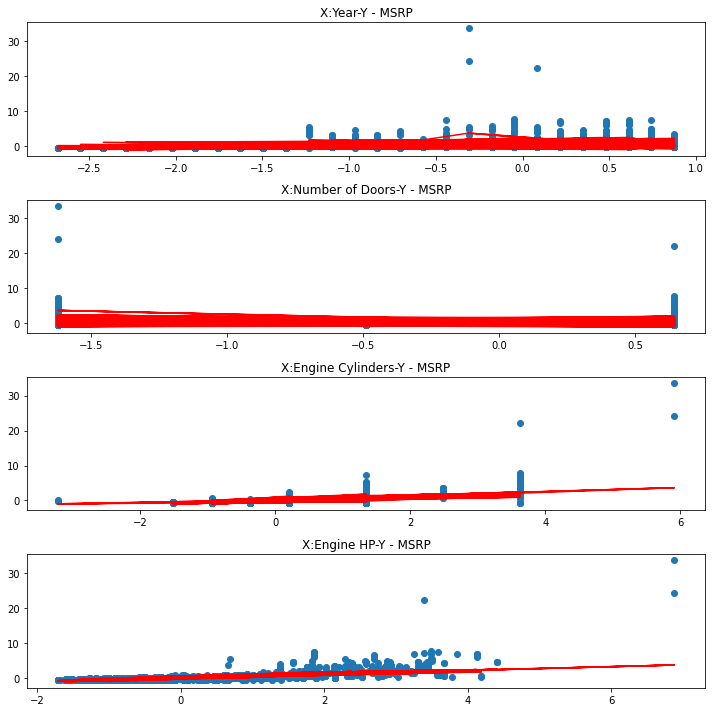

In [11]:
ploteo(train_x_scaler,train_y_scaler,y_predict,theta_optimum,features,label_y)

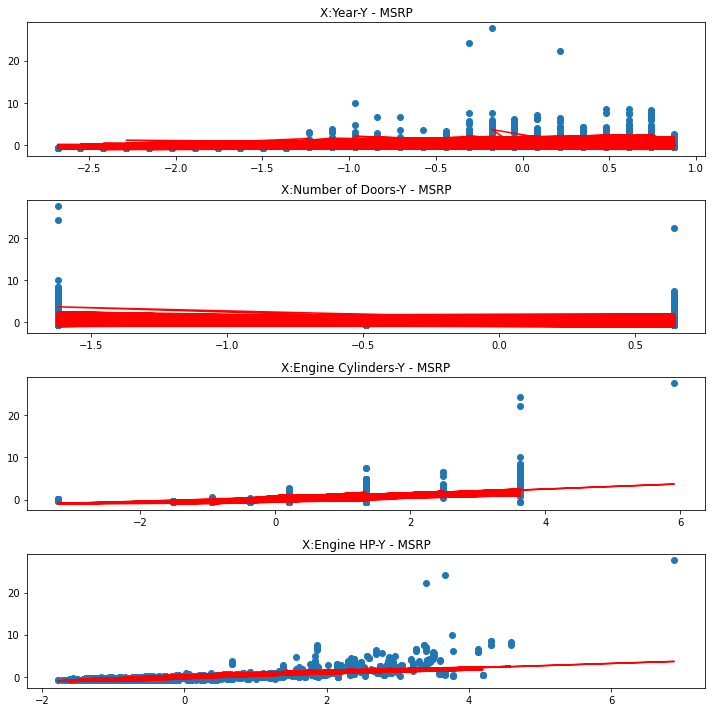

In [12]:

n_ones = np.ones([len(test_x_scaler), 1])
test_x_scaler = np.concatenate((n_ones, test_x_scaler), axis=1)

y_predict_test = predict(theta_optimum,test_x_scaler)

ploteo(test_x_scaler,test_y_scaler,y_predict_test,theta_optimum,features,label_y)

## Experimentos 2 (70% 30%)

In [13]:
features = ["Year","Number of Doors","Engine Cylinders","Engine HP"]
label_y = "MSRP"
name_file = "data"

df_scaler = readData_scaler(name_file,features,label_y)

confg_train = [0.01, 100]
theta_optimum, train_x_scaler, train_y_scaler, y_predict, test_x_scaler,test_y_scaler= experiment(
    df_scaler, confg_train, features, label_y, percentage_test=0.3
)

Theta = [-0.00123468  0.10659598 -0.06415012  0.2341974   0.31196712]
Final Cost =  0.30320122747155215


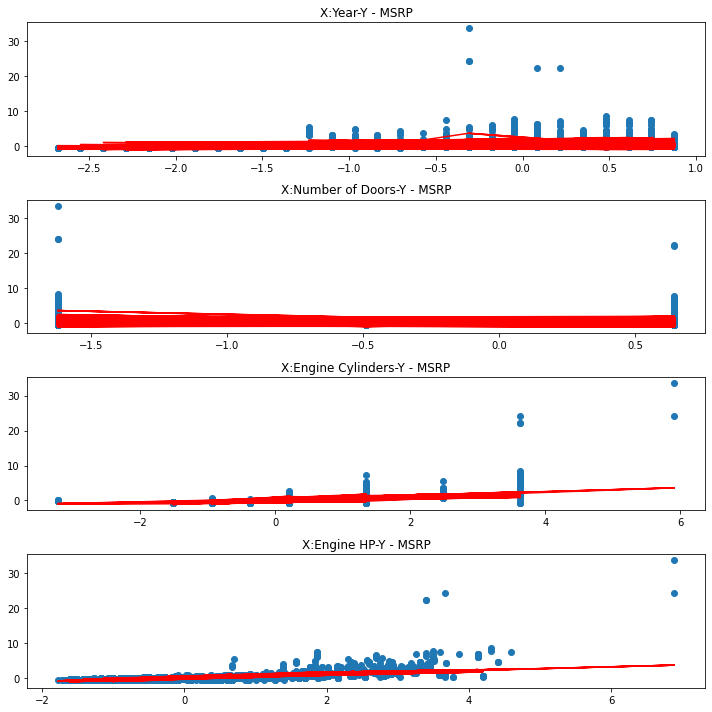

In [14]:
ploteo(train_x_scaler,train_y_scaler,y_predict,theta_optimum,features,label_y)

In [15]:
n_ones = np.ones([len(test_x_scaler), 1])
test_x_scaler = np.concatenate((n_ones, test_x_scaler), axis=1)

y_predict_test = predict(theta_optimum, test_x_scaler)
print(
    "Costo Final: ",
    fun_cost(test_x_scaler, test_y_scaler, theta_optimum),
)


Costo Final:  0.2515811452641546


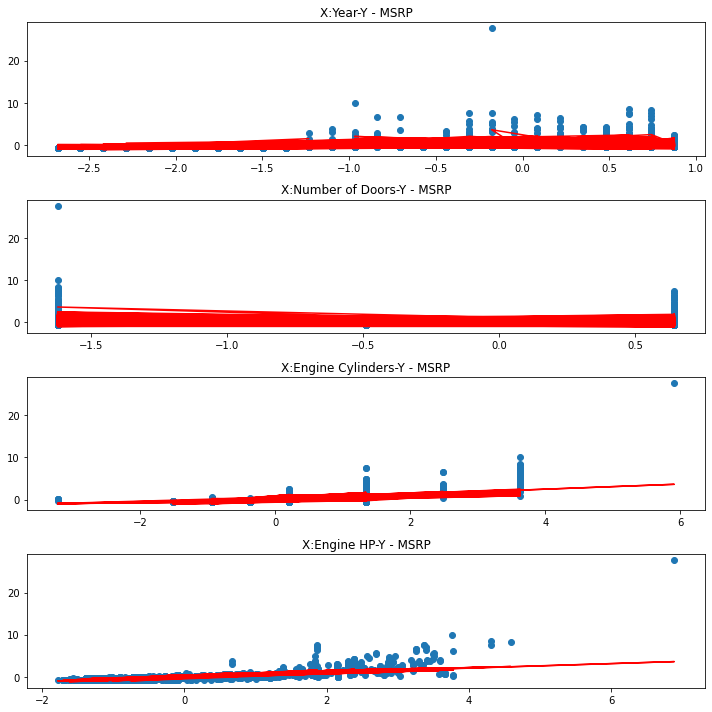

In [16]:
ploteo(test_x_scaler, test_y_scaler, y_predict_test, theta_optimum, features, label_y)

## Experimentos 3 (30% 70%)

In [17]:
print(test_x_scaler.shape)
print(test_y_scaler.shape)
print(train_x_scaler.shape)
print(train_y_scaler.shape)

(3545, 5)
(3545,)
(8270, 5)
(8270,)


In [18]:
train_x_scaler, train_y_scaler, test_x_scaler, test_y_scaler = (
    test_x_scaler,
    test_y_scaler,
    train_x_scaler,
    train_y_scaler,
)
thetas = np.zeros(len(features) + 1)
confg_train = [0.01, 100]
theta_optimum, cost_history, theta_history = gradient_descent(
        train_x_scaler, train_y_scaler, thetas, confg_train[0], confg_train[1]
    )
    
print("Theta =", theta_optimum)
print("Final Cost = ", cost_history[-1])

Theta = [ 0.00288164  0.10239561 -0.06344141  0.22763726  0.32302962]
Final Cost =  0.25064712630018143


In [19]:
print(test_x_scaler.shape)
print(test_y_scaler.shape)
print(train_x_scaler.shape)
print(train_y_scaler.shape)

(8270, 5)
(8270,)
(3545, 5)
(3545,)


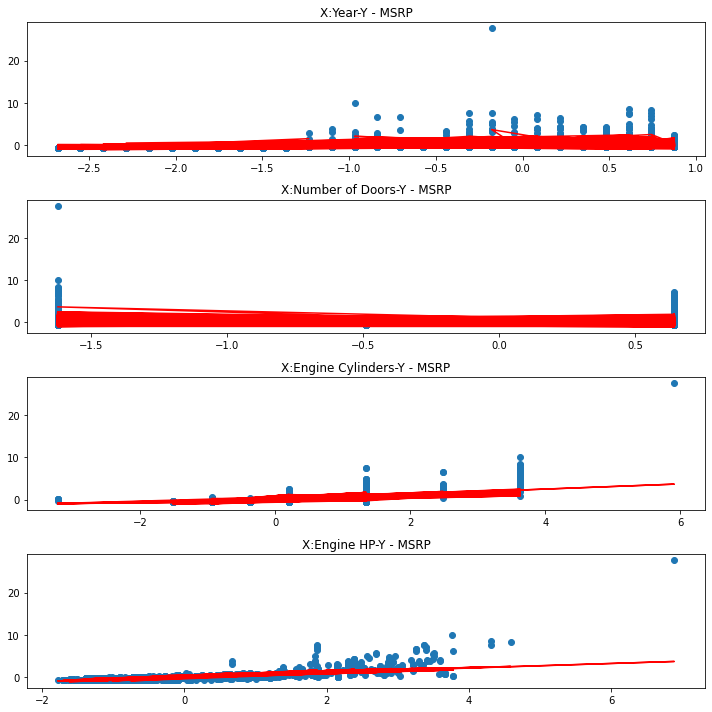

In [20]:
y_predict = predict(theta_optimum,train_x_scaler)
ploteo(train_x_scaler,train_y_scaler,y_predict,theta_optimum,features,label_y)

In [21]:
y_predict_test = predict(theta_optimum, test_x_scaler)
print(
    "Costo Final: ",
    fun_cost(test_x_scaler, test_y_scaler, theta_optimum),
)

Costo Final:  0.30250146246003967


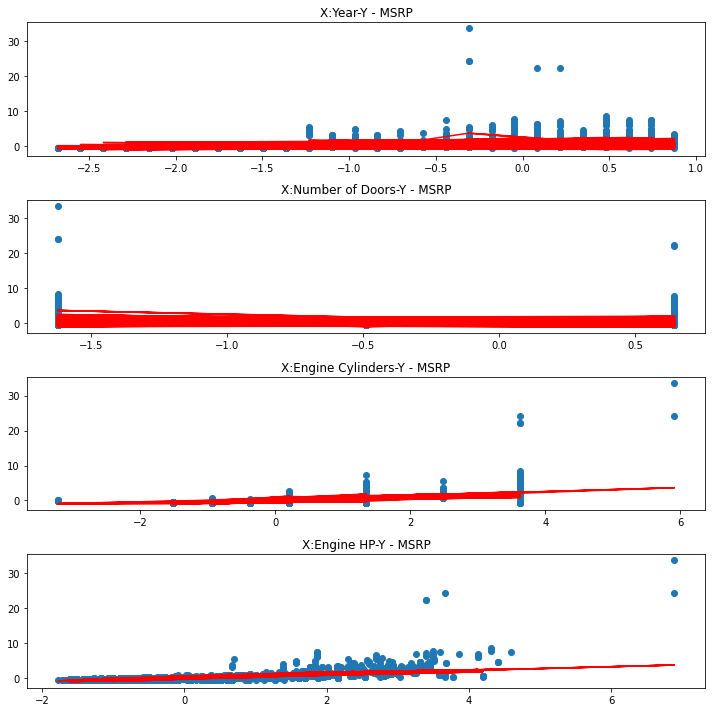

In [22]:
ploteo(test_x_scaler,test_y_scaler,y_predict_test,theta_optimum,features,label_y)